## Skoda Used Car Analysis

**Author:
<br> Md. Tariqul Islam
<br> B.Sc. Civil Engg. (KUET)**

In this notebook, we are working on part of a kaggle dataset containing used car information in the US for a total of 7 brands namely Audi, BMW, Skoda, Ford, Volkswagen, Toyota and Hyundai.
(*Dataset Source:* https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw)

<br>We will be performing Exploratory Data Analysis (EDA) on the used car data for a particular brand, namely Skoda, present in this dataset and try to visualize and answer some questions about this data.

### Import Required Libraries

As mentioned above, we will be performing data analysis and visualization on our dataset. Hence we will require the following libraries to be imported into our notebook.
- `pandas` for data analysis
- `matplotlib.pyplot` and `seaborn` for data visualization

The following lines of codes will import the required libraries mentioned above.

In [1]:
# Import Libraries Data Analysis and Numerical Operations
import pandas as pd

# Import Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Import the Dataset

The next step will be importing our data into the notebook. The filtered data from the original dataset, containing only the information on the Skoda brand cars, are saved as a CSV file named `skoda.csv`. We can use the `pandas.read_csv()` function to import this data in our notebook as a pandas dataframe object.

In [2]:
# Import data from a CSV file
df = pd.read_csv("skoda.csv")

### Explore the Data

It is a good practice to explore the newly imported data and get familiar with every aspects of the dataset before diving into any data analysis operations. Spending a little extra time to understand the data in hand is always helpful in the long run for any data analysis related tasks.

The simplest way of getting a good look at our data is to display the dataframe using the `display()` comamand.

In [3]:
# Display the dataframe
display(df)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,40.9,1.5
...,...,...,...,...,...,...,...,...
6262,Yeti,2014,11440,Semi-Auto,14569,Petrol,44.8,1.2
6263,Octavia,2014,10990,Semi-Auto,49999,Petrol,56.5,1.4
6264,Fabia,2017,9500,Semi-Auto,17131,Petrol,61.4,1.0
6265,Citigo,2016,5999,Manual,21747,Petrol,62.8,1.0


We can readily see the first and last few rows of our dataset along with a summary at the bottom stating that the dataset consists of 6267 rows  and 8 columns. That means our dataset for used skoda cars contains a total of 6267 observations and 8 features for the observations.

Next we can display the dataframe information to get a summary of the features and their datatypes along with some other informations.

In [4]:
# Display Dataframe Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6267 non-null   object 
 1   year          6267 non-null   int64  
 2   price         6267 non-null   int64  
 3   transmission  6267 non-null   object 
 4   mileage       6267 non-null   int64  
 5   fuelType      6267 non-null   object 
 6   mpg           6267 non-null   float64
 7   engineSize    6267 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 391.8+ KB


We can see that among the 8 features contained in the dataset, 5 are in numerical formats and the other 3 are in string format. Also there are no missing values in any of the features in this dataframe, so no data cleaning operations are required.

### Explain the features

Now we can get familiarized with the features contained in this dataframe to get a better understanding of the dataset. The 8 features contained in the dataframe are:
- `model` : Name of the model of the car in observation
- `year` : The making year of the car in observation
- `price` : The resale price, in US Dollars, of the car in observation
- `transmission` : The transmission system used in the car in observation
- `mileage` : Total number of miles run by the car at the time the study.
- `fuelType` : Type of fuel used by the car
- `mpg` : Number of miles output per galon of fuel
- `engineSize` : The volume of fuel and air that can be pushed through car's cylinders

Now that we have a better understanding of the features present in the dataset, we can set out to develop our Exploratory Data Analysis.

### Set up the Goals

The first step of any exploratory data analysis is to observe the data and set up the goal i.e. some questions to be answered from the data. These questions and the process of finding their answers depends solely on the dataset and what it represents. That's why an in-depth understanding of the dataset is crucial for any EDA problem.

We have already observed our data and introduced the features present in the dataset. We know, from the above descriptions, that our dataset consists of a total 8 features which can be classified as categorical and numerical as follows.
- Categorical features
    - `model`
    - `year`
    - `transmission`
    - `fueldType`
- Numerical features
    - `price`
    - `mileage`
    - `mpg`
    - `engineSize`

It can easily be understood from the dataset that the most important feature in this dataset is the `price` of a car which is dependant on the other seven features present in this dataset and can be identified as the **target feature** of our exploratory data analysis.

As the `price` feature is a numerical variable, we can set out to find some very common numerical statistics of this feature such as the *maximum*, *minimum*, *average*, *total*, etc.

As mentioned earlier, the `price`  feature is dependant on the other features of this dataset. But a thorough observation will reveal that the value of this features is more dependant on the three categorical features namely the `model`, `transmission` and `fuelType` than the other variables which are less significant compared to these three.

So, we can take these three categorical features as our control features and individually find out the top values, average selling prices, and total sale of the feature in question.

Although we can find out the answers to these questions in numerous ways, the best approach for this task will be to perform the EDA and visually represent the answers to the questions using barplots.

Hence, our goal is to perform Exploratory data analysis based on `model`, `transmission` and `fuelType`, and create barplots answering the following questions
- Top selling values of the feature in question
- Average selling price for the top values of the feature
- Total sales price for the top values of the feature

### Set up the Analysis Steps

The next step after setting up the analysis goals is to set up the analysis steps for achieveing that goals. Our goal is to answer the three questions above and create barplots individually based on three controlling features, namely the `model`, `transmission` and `fuelType`. We can follow the steps listed below to achieve this goal.
- Group the data in a new dataframe based on the values of the controlling feature in consideration using the `dataframe.groupby()` or the `pandas.pivot_table()` commands.
- Use the appropriate data aggregation feature for the method used above to generate the required values for answering the questions. The values to be aggregated are as follows.
    - `count` for determining the top values
    - `mean` for determining the average sales price
    - `sum` for determining the total sales
- Perform any data preprocessing operations required before the visualization.
- Create barplots with appropriate formatting and labeling applied

#### Aggregate the data in new dataframes

We will use the `dataframe.groupby()` method for data aggregation and create three new dataframes with the data aggregated into them based on the three control features stated above.

In [5]:
# Aggregate the data into a new dataframe based on `model`
df_model = pd.pivot_table(df, index = "model", values = "price", aggfunc = ['count', 'mean', 'sum'])

# Display the result
display(df_model.head(10))

,count,mean,sum
,price,price,price
model,,,
Citigo,470,6925.561702,3255014
Fabia,1571,9906.497136,15563107
Kamiq,141,19904.290780,2806505
Karoq,390,21067.546154,8216343
Kodiaq,472,25652.368644,12107918
Octavia,1477,13991.955315,20666118
Rapid,152,8277.611842,1258197
Roomster,17,5407.882353,91934


In [6]:
# Aggregate the data into a new dataframe based on `transmission`
df_transmission = pd.pivot_table(df, index = "transmission", values = "price", aggfunc = ['count', 'mean', 'sum'])

# Display the result
display(df_transmission)

,count,mean,sum
,price,price,price
transmission,,,
Automatic,1104,20609.333333,22752704
Manual,3754,11658.523974,43766099
Other,1,15999.000000,15999
Semi-Auto,1408,16285.112926,22929439


In [7]:
# Aggregate the data into a new dataframe based on `fuelType`
df_fuelType = pd.pivot_table(df, index = "fuelType", values = "price", aggfunc = ['count', 'mean', 'sum'])

# Display the result
display(df_fuelType)

,count,mean,sum
,price,price,price
fuelType,,,
Diesel,2069,16280.816820,33685010
Hybrid,18,31225.944444,562067
Other,9,14957.777778,134620
Petrol,4171,13206.076241,55082544


As we can see above, our data have been aggregated into three new dataframes as expected. But if we display the column names for any of the dataframes, we will see that each of the column names are formated as tuples.

In [8]:
# Display Dataframe column names
display(df_model.columns)

MultiIndex([('count', 'price'),
            ( 'mean', 'price'),
            (  'sum', 'price')],
           )

Here it says that the columns are `MultiIndex` instead of `Index` and the column names are indexed as tuples. We need to change the column names for each of the dataframes to make further analyses easier.

In [9]:
# Change the column names
df_model.columns = ['count', 'mean', 'sum']
df_transmission.columns = ['count', 'mean', 'sum']
df_fuelType.columns = ['count', 'mean', 'sum']

# Display the column names
display(df_model.columns)
display(df_transmission.columns)
display(df_fuelType.columns)

Index(['count', 'mean', 'sum'], dtype='object')

Index(['count', 'mean', 'sum'], dtype='object')

Index(['count', 'mean', 'sum'], dtype='object')

Now we can see that the column names are now in more easily accessible formats.

#### Data Pre-Processing for Visualization

Let us first display the `df_transmission` dataframe and analyze the values to determine the required data pre-processing operations.

In [10]:
# Display Dataframe
display(df_transmission)

,count,mean,sum
transmission,,,
Automatic,1104,20609.333333,22752704
Manual,3754,11658.523974,43766099
Other,1,15999.000000,15999
Semi-Auto,1408,16285.112926,22929439


Upon inspection of the dataframed displayed above, we can find the required data pre-processing required before visualization as listed below.
1. Displaying the top values of the features as a percentage of the total is more suitable and easily comparable instead of displaying the actual value counts as shown above. So we need to create a new column named `percentage` and calculate the percentage of the `count` values in each row for visualization purpose. Then we can drop the `count` column as we will no longer be needing the count values.
2. The values in the `mean` column are showing too many digits after the decimal point. We can round the values to two decimal points for better visualization.
3. The values in the `sum` column are too large for visualization. We can convert them to *Million Dollars* instead of *Dollars* before performing the visualization.
4. Sort the dataframe in descending order based on the values in the `percentage` column

Since the pre-processing steps will be the same for all three of the dataframes, we can combine them into a function and apply the function to the dataframes.

##### Create a Function for Data Pre-Processing

In [11]:
def preProcess(dataframe):
    # Create a percentage column
    dataframe['percentage'] = (dataframe['count']/dataframe['count'].sum())*100
       
    # Remove the count column
    dataframe.drop('count', axis = 1, inplace = True)
   
    # Convert the sum values into millions
    dataframe['sum'] = dataframe['sum']/1000000
    
    # Round the dataframe values to two decimal points
    dataframe.update(dataframe.round(2))
    
    # Sort the dataframe based on percentage column
    dataframe.sort_values(by = 'percentage', ascending = False, inplace = True)
    
    # Display the Dataframe
    display(dataframe.head())

Now we can apply this function to all our dataframes by passing the dataframe names as the function argument individually and see the results below.

In [12]:
# Pre-Process df_model
preProcess(df_model)

# Pre-Process df_transmission
preProcess(df_transmission)

# Pre-Process df_fuelType
preProcess(df_fuelType)


,mean,sum,percentage
model,,,
Fabia,9906.50,15.56,25.07
Octavia,13991.96,20.67,23.57
Superb,18898.26,14.95,12.62
Kodiaq,25652.37,12.11,7.53
Citigo,6925.56,3.26,7.50


,mean,sum,percentage
transmission,,,
Manual,11658.52,43.77,59.90
Semi-Auto,16285.11,22.93,22.47
Automatic,20609.33,22.75,17.62
Other,15999.00,0.02,0.02


,mean,sum,percentage
fuelType,,,
Petrol,13206.08,55.08,66.55
Diesel,16280.82,33.69,33.01
Hybrid,31225.94,0.56,0.29
Other,14957.78,0.13,0.14


Now our dataframes are ready for visualization.

### Data Visualization

The data visualization process consists of some steps to achieve the desired output. The steps involved can be summarized as follows.

1. Set up the visualization context and style.
2. In case of multiple visualizations, create a figure with appropriate size and include the visualizations as subplots on the figure.
3. Provide a Central Title for the visualizations.
4. Set the location on the figure for a new visualization
5. Create the individual visualization
    - Provide `x-axis` and `y-axis` data sources along with the `dataframe`
    - Provide appropriate orientation and colors (if required)
    - Provide appropriate title for the subplot
    - Provide appropriate axis labels
6. Adjust the subplot layouts.
7. Finally, display the visualization

We can see from the steps listed above that we will be repeating step 5 for each new visualization in our notebook. Hence we can create a function to take care of this step as follows.

In [13]:
# Create a custom function for creating a BarPlot
def customBarPlot(data=None, x=None, y=None, orient=None, color=None, title=None, xlabel=None, ylabel=None):
    sns.barplot(x = x, y = y, data = data, orient = orient, color = color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

Now we can use the `customBarPlot()` function to create our individual visualizations.

We will be creating a total of 9 barplots in a 3x3 pattern contained in a tight layout on a single plot figure. The following lines of codes will create our desired visualizations.

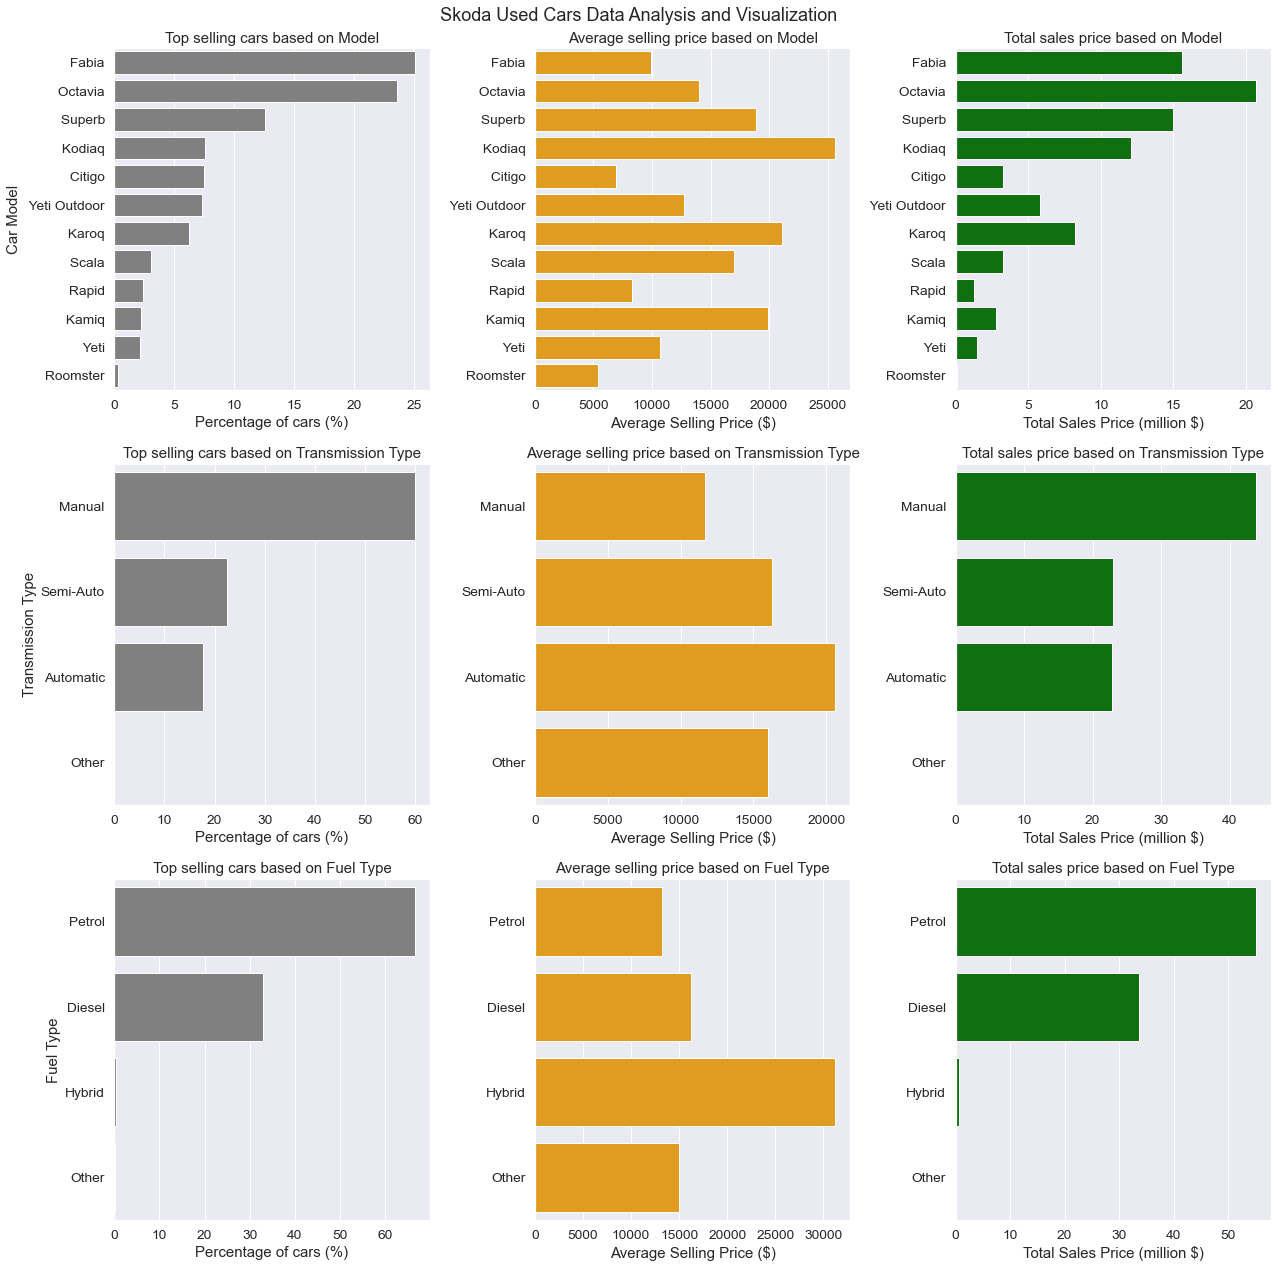

In [14]:
# Set up the visualization context and style
sns.set_context("notebook", font_scale = 1.25)
sns.set_style("darkgrid")

# Create a figure
plt.figure(figsize = (18,18))

# Provide a Central Title for the figure and adjust the subplot layouts
plt.suptitle("Skoda Used Cars Data Analysis and Visualization")

# Create Barplot in Position: 1 Based on Model showing values for Percentage
plt.subplot(3, 3, 1)
customBarPlot(data = df_model,
             x = 'percentage',
             y = df_model.index,
             orient = 'h',
             color = 'grey',
             title = "Top selling cars based on Model",
             xlabel = "Percentage of cars (%)",
             ylabel = "Car Model")

# Create Barplot in Position: 2 Based on Model showing values for average selling price
plt.subplot(3, 3, 2)
customBarPlot(data = df_model,
             x = 'mean',
             y = df_model.index,
             orient = 'h',
             color = 'orange',
             title = "Average selling price based on Model",
             xlabel = "Average Selling Price ($)",
             ylabel = "")

# Create Barplot in Position: 3 Based on Model showing values for total sales
plt.subplot(3, 3, 3)
customBarPlot(data = df_model,
             x = 'sum',
             y = df_model.index,
             orient = 'h',
             color = 'green',
             title = "Total sales price based on Model",
             xlabel = "Total Sales Price (million $)",
             ylabel = "")

# Create Barplot in Position: 4 Based on Transmission Type showing values for Percentage
plt.subplot(3, 3, 4)
customBarPlot(data = df_transmission,
             x = 'percentage',
             y = df_transmission.index,
             orient = 'h',
             color = 'grey',
             title = "Top selling cars based on Transmission Type",
             xlabel = "Percentage of cars (%)",
             ylabel = "Transmission Type")

# Create Barplot in Position: 5 Based on Transmission Type showing values for average selling price
plt.subplot(3, 3, 5)
customBarPlot(data = df_transmission,
             x = 'mean',
             y = df_transmission.index,
             orient = 'h',
             color = 'orange',
             title = "Average selling price based on Transmission Type",
             xlabel = "Average Selling Price ($)",
             ylabel = "")

# Create Barplot in Position: 6 Based on Transmission Type showing values for total sales
plt.subplot(3, 3, 6)
customBarPlot(data = df_transmission,
             x = 'sum',
             y = df_transmission.index,
             orient = 'h',
             color = 'green',
             title = "Total sales price based on Transmission Type",
             xlabel = "Total Sales Price (million $)",
             ylabel = "")

# Create Barplot in Position: 7 Based on Fuel Type showing values for Percentage
plt.subplot(3, 3, 7)
customBarPlot(data = df_fuelType,
             x = 'percentage',
             y = df_fuelType.index,
             orient = 'h',
             color = 'grey',
             title = "Top selling cars based on Fuel Type",
             xlabel = "Percentage of cars (%)",
             ylabel = "Fuel Type")

# Create Barplot in Position: 8 Based on Fuel Type showing values for average selling price
plt.subplot(3, 3, 8)
customBarPlot(data = df_fuelType,
             x = 'mean',
             y = df_fuelType.index,
             orient = 'h',
             color = 'orange',
             title = "Average selling price based on Fuel Type",
             xlabel = "Average Selling Price ($)",
             ylabel = "")

# Create Barplot in Position: 9 Based on Fuel Type showing values for total sales
plt.subplot(3, 3, 9)
customBarPlot(data = df_fuelType,
             x = 'sum',
             y = df_fuelType.index,
             orient = 'h',
             color = 'green',
             title = "Total sales price based on Fuel Type",
             xlabel = "Total Sales Price (million $)",
             ylabel = "")

# sns.barplot(x = 'percentage', y = df_model.index, data = df_model, orient = 'h', color = 'black')

# Adjust the subplot layouts
plt.tight_layout()

# Display the visualization
plt.show()

The figure above visually answers the questions set out before the EDA of the control feature in question as barplots with appropriate labels added to them.